<a href="https://colab.research.google.com/github/allaalmouiz/gaussianNB_scratch/blob/main/gaussianNB_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Naive Bayes: Iris Challange - Module 2 | Part 2
Submitted by: **`Alaa Almouiz F. Moh.`**

ID Number: **`S2026_176`**

Track: **Machine Learning**

For: **ZAKA ©**

## **1- Problem Statement (Objective)**

I saw an iris rose, measures it's sepal length and width and also did the same for the petal. How to predict it's type?

My target here is building a machine learning model that predicts the `species` of an iris flower based on its measurements **Classification Model**.
1. Implement Gaussian Naive Bayes from scratch.
2. Implemet the scikit-learn’s version.
3. Evaluate both models' performance.

### **Dataset**
Iris Dataset (Download here: [Data](https://drive.google.com/file/d/1kOZgprQhpJ0EQkCU-WBhE5Y8toW8bHnk/view)).
The dataset variables include:

* `sepal length (cm)`
* `sepal width (cm)`
* `petal length (cm)`
* `petal width (cm)`
* `target`: Setosa (0), VersiColour (1), and Virginica (2)

## **2- Data Preparation**

**Import necessary python modules**

We will need the following libraries:

* Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
* Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
* Matplotlib — plotting & visualization.
* scikit-learn — a tool for data mining and machine learning models.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, classification_report

In [2]:
# The iris Dataset is already in SiKiLearn library
iris = datasets.load_iris()

In [3]:
# The dataset is already a dictionary that contains the following keys
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# Creating a dataframe
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target'])

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## **3- EDA: Understanding the Dataset**



In [6]:
n_rows = df.shape[0]
n_cols = df.shape[1]
print(f'The dataset has {n_rows} rows and {n_cols} columns')

The dataset has 150 rows and 5 columns


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


The data type for all the data is `float64` and there's no null values

In [8]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


In [9]:
# Removing the white spaces from the names of columns

df.columns = df.columns.str.replace(' ', '_')

In [10]:
df.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [11]:
df.describe()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
# Checking Duplicates

df.duplicated().sum()

np.int64(1)

There's one duplicate, we can drop it.

In [13]:
df = df.drop_duplicates()
print(len(df))

149


## **4- Visualization Stage**

### **A: Correlation between the numerical features** - Heatmap

Text(0.5, 1.0, 'Features Correlation Heatmap')

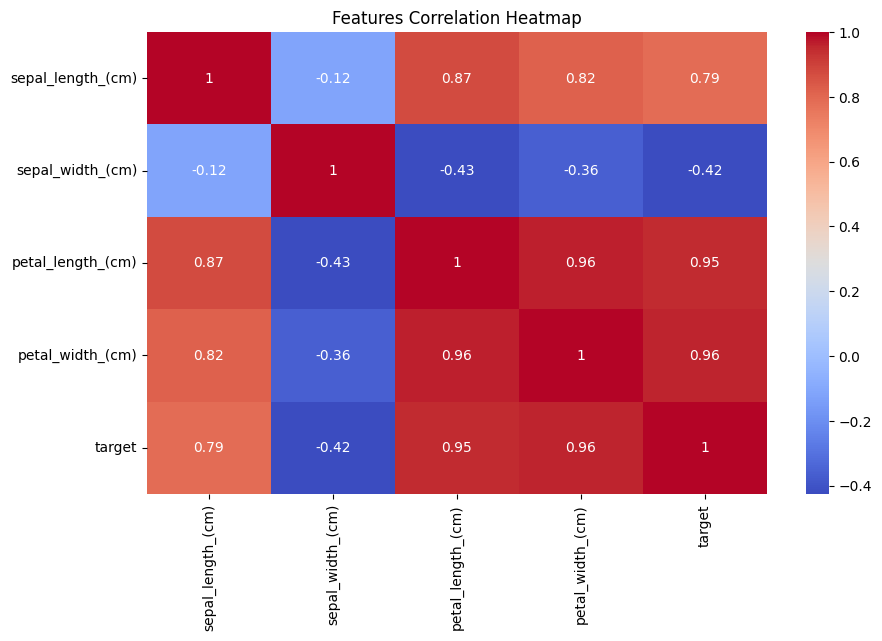

In [14]:
# Heat map for correlation

plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Features Correlation Heatmap")

**First pattern to notice:**

From the Heatmap it's clear that the `petal_length_(cm)` and the `petal_width_(cm)` have a high **positive correaltion** ~0.95 with the target, therefore, they play a huge rule in determing the type of the iris rose.

while the `sepal_length_(cm)` have weak positive correlation with the target.


### **B: Pair plot for the features of the Iris flowers** - Pair plot and KDEs

<Figure size 800x500 with 0 Axes>

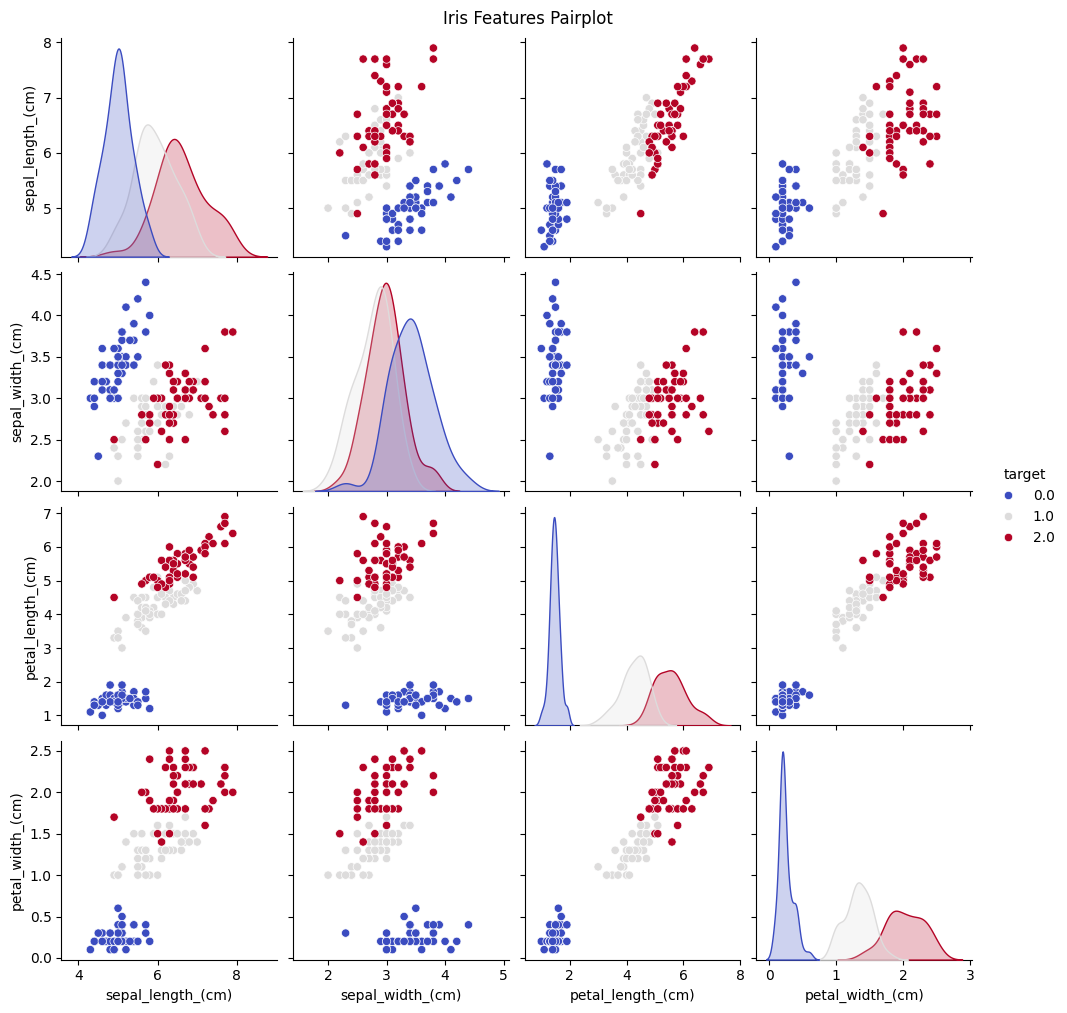

In [15]:
plt.figure(figsize= (8,5))

sns.pairplot(df, hue='target', diag_kind='kde', palette='coolwarm')
plt.suptitle('Iris Features Pairplot', y=1.01)
plt.show()

**Second pattern to notice**

From the Kdes, Versicolor (1) and Virginica (2) overlap in sepal features, unlike Setosa (0) which have it's own ranges specially in petal features.

## **5- Building the ML Models**

#### Preparing the data before feeding it into the model

In [16]:
df.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [17]:
# Storing the datset
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [18]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (149, 4)
y shape: (149,)


#### Splitting the Dataset into `X_train`, `X_test`, `y_train`, and `y_test`.

In [19]:
# Splitting the dataset into testing and training

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [20]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (119, 4)
X_test shape: (30, 4)
y_train shape: (119,)
y_test shape: (30,)


In [21]:
X_train[:5]

array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2]])

In [22]:
y_train[:5]

array([0., 0., 1., 0., 0.])

#### Standerdizing the dataset

In [23]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [24]:
# print(f"X_train_scalaed: ", X_train_scaled[:5])
# print("")
# print(f"X_test_scaled: ", X_test_scaled[:5])

### **Part One:** Gaussian Naive Bayes From Scratch

`GaussianNB_scratch` class is having three function

1. `fit`
2. `_log_gaussian_pdf`
3. `predict`

The concept, I did put here in the drive [(link for teh Gaussian NB function derivation)](https://drive.google.com/file/d/1AiEdmvAR5V5r__lsafvOMtAPhS3atfc9/view?usp=sharing)







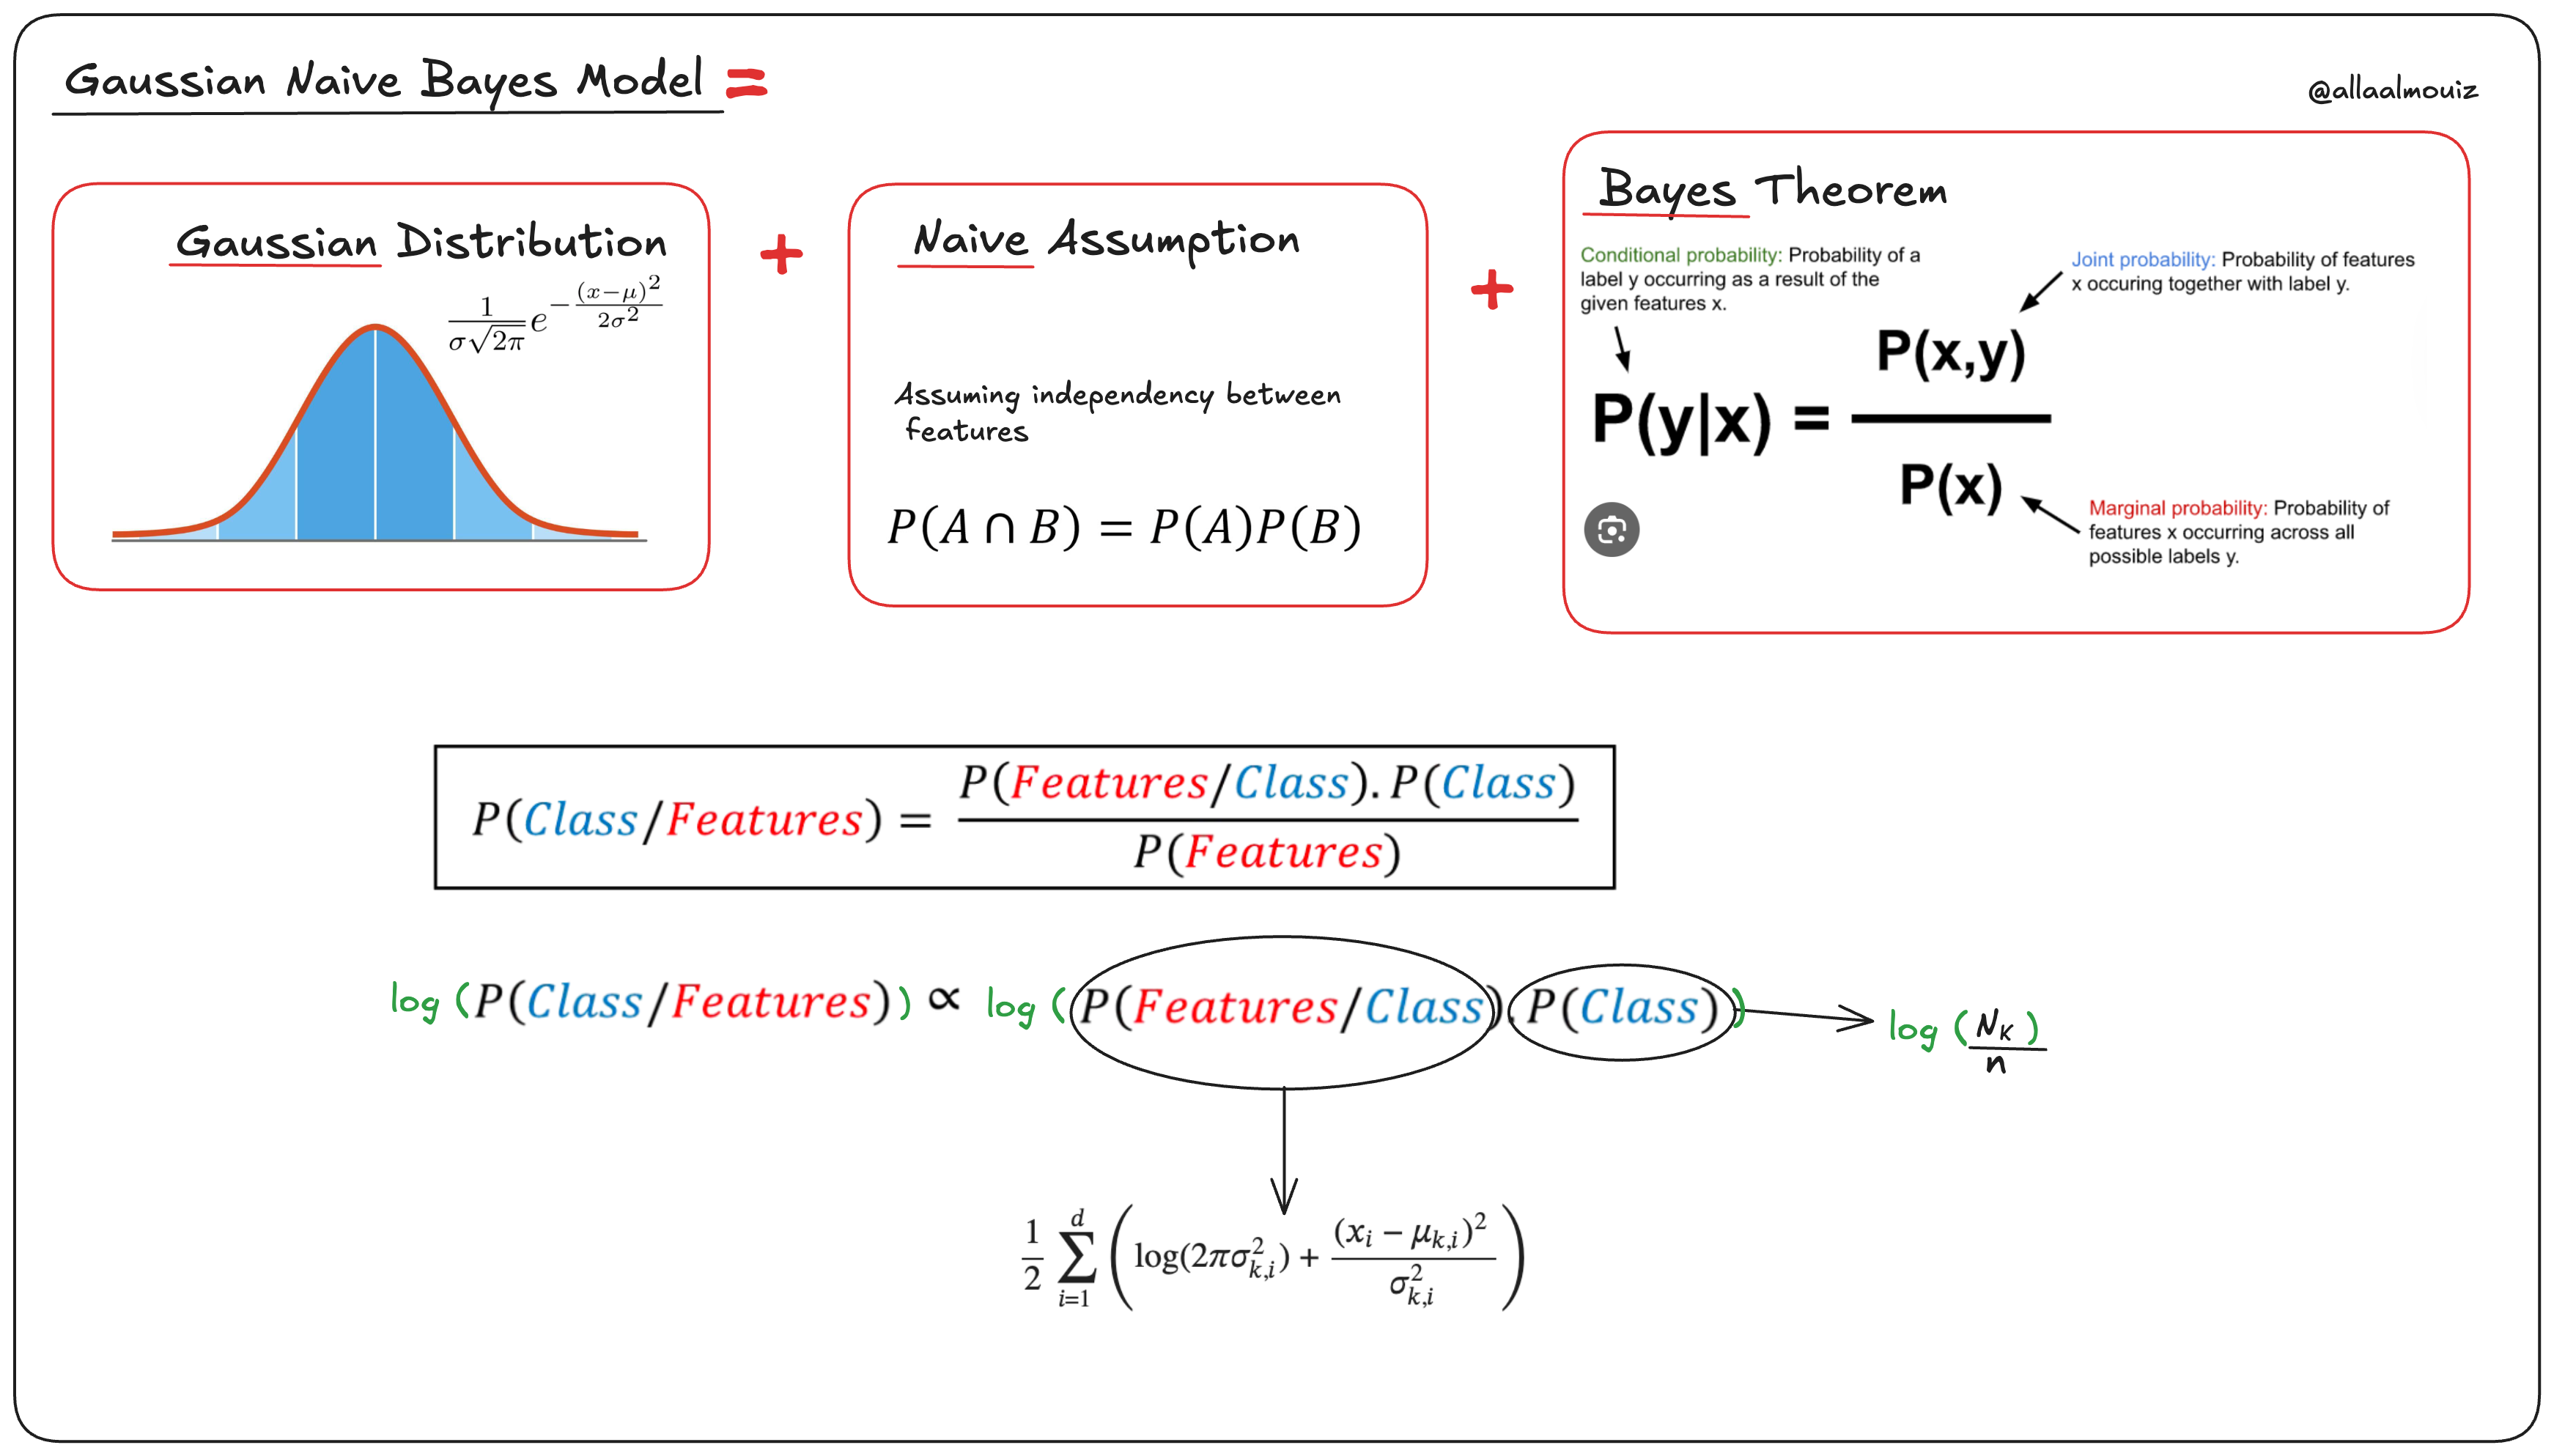

In [25]:
class GaussianNB_scratch:
  def fit(self, X, y):
    self.classes_ = np.unique(y)
    n_classes, n_features = len(self.classes_), X.shape[1]

    self.means_ = np.zeros((n_classes, n_features))
    self.vars_ = np.zeros((n_classes, n_features))
    self.priors_ = np.zeros(n_classes)

    for i, c in enumerate(self.classes_):
      Xk = X[y == c]
      self.means_[i] = Xk.mean(axis=0)
      self.vars_[i] = Xk.var(axis=0)
      self.priors_[i] = Xk.shape[0] / X.shape[0]

    return self

  def _log_gaussian_pdf(self, X):
    num = -0.5 * (X[:, None, :] - self.means_)**2 / self.vars_
    log_prob = num - 0.5 * np.log(2 * np.pi * self.vars_)

    return log_prob.sum(axis=2)

  def predict(self, X) :
      X = np. asarray (X)
      log_likelihood = self._log_gaussian_pdf (X)
      log_prior = np. log(self.priors_)

      return self.classes_[np.argmax(log_likelihood + log_prior, axis=1)]

In [26]:
gaussianNB_scratch = GaussianNB_scratch()
gaussianNB_scratch.fit(X_train, y_train)

In [27]:
# Using the function we built to predict the classes
y_pred_scratch = gaussianNB_scratch.predict(X_test)

In [28]:
y_pred_scratch

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0.])

In [29]:
y_test

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0.])

In [30]:
# Testing on a snippet (given in the challange)
gaussianNB_scratch.predict([[4.9, 3.0, 1.4, 0.2]])

array([0.])

In [31]:
# Testing on the 7th sample in the data set

print(f"The 7th Data Sample in the testing set is {X_test[6]}")
print(f"The predicted class is {y_pred_scratch[6]}")
print(f"The real class based on the target values {y_test[6]}")

print(" ")
print("Yayyyyyy That's Correct!!!")

The 7th Data Sample in the testing set is [5.6 2.9 3.6 1.3]
The predicted class is 1.0
The real class based on the target values 1.0
 
Yayyyyyy That's Correct!!!


#### Evaluating the `GaussianNB_scratch` predictions

In [32]:
# Evaluating the Gaussian NB (Scratch) Model

print("Accuracy: \n", accuracy_score(y_test, y_pred_scratch))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_scratch))
print("Classification Report: \n", classification_report(y_test, y_pred_scratch))
print("Precision Score: \n", precision_score(y_test, y_pred_scratch, average='weighted'))
print("Recall Score: \n", recall_score(y_test, y_pred_scratch, average='weighted'))

Accuracy: 
 1.0
Confusion Matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Precision Score: 
 1.0
Recall Score: 
 1.0


### **Part Two:** Sci-Kit Learn Gaussuian Naive Bayes

In [33]:
gaussianNB = GaussianNB()
gaussianNB.fit(X_train, y_train)

GaussianNB()

In [34]:
y_pred_sci = gaussianNB.predict(X_test)

In [35]:
y_pred_sci

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0.])

In [36]:
y_test

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0.])

In [37]:
# Evaluating the Sci-Kit Gaussian Naive Bayes Model

print("Accuracy: \n", accuracy_score(y_test, y_pred_sci))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_sci))
print("Classification Report: \n", classification_report(y_test, y_pred_sci))
print("Precision Score: \n", precision_score(y_test, y_pred_sci, average='weighted'))
print("Recall Score: \n", recall_score(y_test, y_pred_sci, average='weighted'))

Accuracy: 
 1.0
Confusion Matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Precision Score: 
 1.0
Recall Score: 
 1.0


In [38]:
# Testing on a snippet (given in the challange)
gaussianNB.predict([[4.9, 3.0, 1.4, 0.2]])

array([0.])

In [39]:
# Testing on the 7th sample in the data set

print(f"The 7th Data Sample in the testing set is {X_test[6]}")
print(f"The predicted class is {y_pred_sci[6]}")
print(f"The real class based on the target values {y_test[6]}")

print(" ")
print("Yayyyyyy That's Correct!!!")

The 7th Data Sample in the testing set is [5.6 2.9 3.6 1.3]
The predicted class is 1.0
The real class based on the target values 1.0
 
Yayyyyyy That's Correct!!!


## **6- Final Thoughts**


Both the Gassian NB Model from scratch and the Sci-Kit learn predicted all the values correctly with an `accuracy`, `recall`, `precision` of 100%

As the data distribution is 50 per each model, the models are not being overfitted, but it learns all the patterns correctly.